In [1]:
import numpy as np
# Sequential 是指模型的每一层是按顺序一层层添加的
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(666)

# 1. 构建数据集

In [3]:
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5*X + np.random.normal(0, 0.05, (200,))

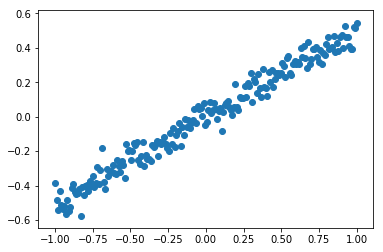

In [4]:
plt.scatter(X, Y)
plt.show()

In [5]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

# 2. 搭建模型

In [6]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))

f:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


In [8]:
model.compile(loss='mse', optimizer='adam')

#  3. 训练模型

In [9]:
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print("train cost: ", cost)

train cost:  0.02842997
train cost:  0.014109731
train cost:  0.0069802785
train cost:  0.0040806527


# 4. 评估模型

In [10]:
cost = model.evaluate(X_test, Y_test, batch_size=40)

40/40 [==============================] - 0s 2ms/step


In [12]:
W, b = model.layers[0].get_weights()

In [13]:
print(W, b)

[[0.44196048]] [0.00150945]


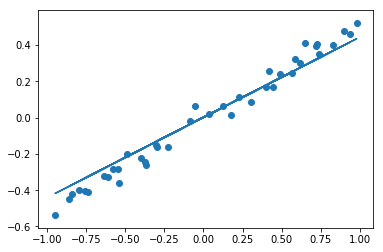

In [14]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()